In [16]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
import os
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import OneHotEncoder
import future 
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
seed = 100
np.random.seed(seed)
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Input

In [17]:
path=os.getcwd()+'\\DATA\\picture_partial'
folder_list =[]
folder = glob.glob(path)
for folder in folder :
    for name in glob.glob(folder+'/*'):
        folder_list.append(name)

image_name =[]
for folder in folder_list:
    for name in glob.glob(folder+'/*.jpg') :
        image_name.append(name)
        
read_images = []
for image in image_name:
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    read_images.append(img)
read_images = np.array(read_images)
print ('Images are all in read_images')
            

Images are all in read_images


In [18]:
x = read_images
#split = np.random.choice(40000,8000,replace=False)

y = np.array(np.repeat(range(1,7),1000).reshape(-1,1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=seed,shuffle=True) 
x_test = x_test.reshape(x_test.shape[0],100,100,1)
x_train = x_train.reshape(x_train.shape[0],100,100,1)

print('Shape of x_train is (%d,%d,%d,%d)'%(x_train.shape))
print('Shape of x_test is (%d,%d,%d,%d)'%(x_test.shape))
print('Shape of y_train is (%d,%d)'%(y_train.shape))
print('Shape of y_test is (%d,%d)'%(y_test.shape))
onehot = OneHotEncoder()

y_train = onehot.fit_transform(y_train).toarray()
y_test_ori = y_test
y_test = onehot.fit_transform(y_test).toarray()
print('Shape of y_train is (%d,%d)'%(y_train.shape))

Shape of x_train is (4800,100,100,1)
Shape of x_test is (1200,100,100,1)
Shape of y_train is (4800,1)
Shape of y_test is (1200,1)
Shape of y_train is (4800,6)


In [ ]:
# epoch = 60 

In [4]:
tensorboard = TensorBoard(log_dir= 'logs\{}'.format('Tf')) 
                                                          #這個指令會在現在的位置在加一個 'log' 的資料夾
                                                          #這裡不用做修改
    
input_tensor = Input(shape=(100, 100, 1))
model_inv3_p_60_1 = Sequential()
model_inv3_p_60_1.add(InceptionV3(input_tensor=input_tensor,weights=None, include_top=False))
model_inv3_p_60_1.add(Flatten())
model_inv3_p_60_1.add(Dense(6,activation = 'softmax'))



filepath="C:\\Users\\user\\Desktop\\project\\inceptionv3_picture_partial\\model_iter60_1.hdf5" 
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True,
mode='max')

model_inv3_p_60_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
train_history_60_1 = model_inv3_p_60_1.fit(x=x_train, y=y_train, validation_split=0.3, epochs=60, batch_size=80, verbose=2,shuffle = True,callbacks = [checkpoint , tensorboard])  


#把訓練結果(train_history_10_1)存成list 匯出去存在'train_history'的資料夾裡     

# file='train_history的資料夾\train_history_10_1.lst'
                                                                          #改
with open(file=r'C:\Users\user\Desktop\project\inceptionv3_picture_partial\train_history_60_1.lst',mode="wb") as outhis:     
                                                    
    pickle.dump(train_history_60_1.history, outhis)  

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 3360 samples, validate on 1440 samples
Epoch 1/60

Epoch 00001: acc improved from -inf to 0.33899, saving model to C:\Users\user\Desktop\project\inceptionv3_picture_partial\model_iter60_1.hdf5
3360/3360 - 38s - loss: 1.6327 - acc: 0.3390 - val_loss: 13.1838 - val_acc: 0.1924
Epoch 2/60

Epoch 00002: acc improved from 0.33899 to 0.43452, saving model to C:\Users\user\Desktop\project\inceptionv3_picture_partial\model_iter60_1.hdf5
3360/3360 - 19s - loss: 1.2744 - acc: 0.4345 - val_loss: 1.8709 - val_acc: 0.1833
Epoch 3/60

Epoch 00003: acc improved from 0.43452 to 0.49970, saving model to C:\Users\user\Desktop\project\inceptionv3_picture_partial\model_iter60_1.hdf5
3360/3360 - 19s - loss: 1.1328 - acc: 0.4997 - val_loss: 2.0803 - val_acc: 0.1736
Epoch 4/60

Epoch 00004: acc improved from 0.49970 to 0.56399, saving model to C:\Users\user\Desktop\project\inceptionv

Epoch 36/60

Epoch 00036: acc did not improve from 0.94494
3360/3360 - 19s - loss: 0.1621 - acc: 0.9432 - val_loss: 0.9704 - val_acc: 0.7500
Epoch 37/60

Epoch 00037: acc improved from 0.94494 to 0.95060, saving model to C:\Users\user\Desktop\project\inceptionv3_picture_partial\model_iter60_1.hdf5
3360/3360 - 19s - loss: 0.1399 - acc: 0.9506 - val_loss: 1.0640 - val_acc: 0.7299
Epoch 38/60

Epoch 00038: acc improved from 0.95060 to 0.95387, saving model to C:\Users\user\Desktop\project\inceptionv3_picture_partial\model_iter60_1.hdf5
3360/3360 - 19s - loss: 0.1263 - acc: 0.9539 - val_loss: 1.1631 - val_acc: 0.7139
Epoch 39/60

Epoch 00039: acc improved from 0.95387 to 0.95595, saving model to C:\Users\user\Desktop\project\inceptionv3_picture_partial\model_iter60_1.hdf5
3360/3360 - 19s - loss: 0.1282 - acc: 0.9560 - val_loss: 1.0302 - val_acc: 0.7250
Epoch 40/60

Epoch 00040: acc did not improve from 0.95595
3360/3360 - 19s - loss: 0.1251 - acc: 0.9548 - val_loss: 1.0731 - val_acc: 0.720

In [5]:
model_inv3_p_60_1.evaluate(x_test,y_test)

1200/1200 [==============================] - 5s 5ms/sample - loss: 1.1286 - acc: 0.7433


[1.1286275744438172, 0.74333334]

In [6]:
from sklearn.metrics import confusion_matrix
import itertools

In [7]:
def plot_confusion_matrix(cm, classes,acc,
                          title='Confusion matrix',
                          cmap=plt.cm.jet):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    plt.suptitle('incv3(Partial)',y=1.01,fontsize=14)
    plt.title(title+'(accuracy='+str(acc)+')')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,np.arange(1,8+1) , rotation=45)
    plt.yticks(tick_marks,np.arange(1,8+1)  )
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.tight_layout()
   # plt.savefig(r'C:\Users\user\Desktop\project\final_model\vgg_picture\confusion_matrix_vgg16_picture01.jpg', bbox_inches='tight') 
    plt.show()

    
    
    
# 显示混淆矩阵
def plot_confuse(model, x_val, y_val,acc):
    predictions = model.predict_classes(x_val)
    truelabel = y_val.argmax(axis=-1)   # 将one-hot转化为label
    conf_mat = confusion_matrix(y_true=truelabel, y_pred=predictions)
    plt.figure()
    plot_confusion_matrix(conf_mat, range(np.max(truelabel)+1),acc)
   

1200/1200 [==============================] - 2s 1ms/sample - loss: 1.1286 - acc: 0.7433


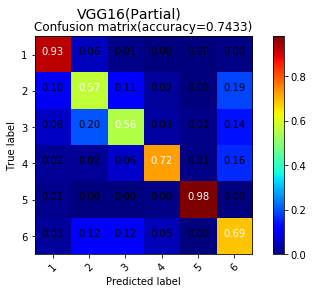

In [9]:
a=model_inv3_p_60_1.evaluate(x_test,y_test)
plot_confuse(model_inv3_p_60_1, x_test, y_test,round(a[1],4))

In [13]:
import pandas as pd

In [10]:
predict=model_inv3_p_60_1.predict(x_test)

In [14]:
y_test_ori=pd.DataFrame(y_test_ori)
y_test_ori=y_test_ori.rename(columns={0:'truelabel'})

  
a=pd.DataFrame(predict)
a=a.rename(columns={0:1, 1:2,2:3,3:4,4:5,5:6})

a['max_value']=a.max(axis=1)
a['second_large_value']=0
   

a['max']=np.argmax(predict,axis=1)+1
a['second_large']=0
 
    

for i in range(0,(a.shape[0])):
    tmp_list=0
    num_list=a.iloc[i,0:6]
    tmp_list=sorted(num_list)
    a['second_large_value'].iloc[i]=tmp_list[-2]
    a['second_large'].iloc[i]=np.where(num_list==tmp_list[-2])[0][0]+1
        
   
        
        
b = pd.merge(y_test_ori, a, how='left',on=y_test_ori.index)


C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
b[1:30]

,key_0,truelabel,1,2,3,4,5,6,max_value,second_large_value,max,second_large
1,1,4,3.849998e-05,2.753765e-04,9.270222e-01,2.029974e-03,9.358391e-05,7.054042e-02,0.927022,7.054042e-02,3,6
2,2,1,9.990707e-01,8.738173e-04,1.133302e-05,5.805762e-06,2.091840e-05,1.746737e-05,0.999071,8.738173e-04,1,2
3,3,6,1.097204e-06,1.019456e-04,4.361572e-04,6.786702e-05,5.536831e-05,9.993375e-01,0.999337,4.361572e-04,6,3
4,4,5,4.751352e-07,4.799034e-10,8.929782e-10,2.104206e-07,9.999993e-01,1.416887e-08,0.999999,4.751352e-07,5,1
5,5,6,4.990045e-07,9.436816e-05,6.315755e-05,2.588182e-05,2.978127e-05,9.997863e-01,0.999786,9.436816e-05,6,2
6,6,1,9.999793e-01,1.518044e-05,6.768965e-07,4.159859e-07,3.455810e-06,1.121041e-06,0.999979,1.518044e-05,1,2
7,7,5,2.330435e-07,1.939023e-08,2.535238e-07,1.630510e-06,9.999073e-01,9.053710e-05,0.999907,9.053710e-05,5,6
8,8,5,1.912536e-07,8.265265e-11,4.398057e-10,5.278522e-07,9.999993e-01,1.596632e-08,0.999999,5.278522e-07,5,4
9,9,1,9.998481e-01,1.258405e-04,3.935750e-06,2.856866e-06,1.167268e-05,7.554288e-06,0.999848,1.258405e-04,1,2
10,10,4,6.780429e-21,8.695398e-19,1.211736e-12,1.000000e+00,2.333203e-34,9.110836e-16,1.000000,1.211736e-12,4,3


In [ ]:
## 80 

In [19]:
tensorboard = TensorBoard(log_dir= 'logs\{}'.format('Tf')) 
                                                          #這個指令會在現在的位置在加一個 'log' 的資料夾
                                                          #這裡不用做修改
    
input_tensor = Input(shape=(100, 100, 1))
model_inv3_p_80_1 = Sequential()
model_inv3_p_80_1.add(InceptionV3(input_tensor=input_tensor,weights=None, include_top=False))
model_inv3_p_80_1.add(Flatten())
model_inv3_p_80_1.add(Dense(6,activation = 'softmax'))



filepath="C:\\Users\\user\\Desktop\\project\\inceptionv3_picture_partial\\model_iter80_1.hdf5" 
checkpoint = ModelCheckpoint(filepath, monitor='acc', verbose=1, save_best_only=True,
mode='max')

model_inv3_p_80_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
train_history_80_1 = model_inv3_p_80_1.fit(x=x_train, y=y_train, validation_split=0.3, epochs=80, batch_size=80, verbose=2,shuffle = True,callbacks = [checkpoint , tensorboard])  


#把訓練結果(train_history_10_1)存成list 匯出去存在'train_history'的資料夾裡     

# file='train_history的資料夾\train_history_10_1.lst'
                                                                          #改
with open(file=r'C:\Users\user\Desktop\project\inceptionv3_picture_partial\train_history_80_1.lst',mode="wb") as outhis:     
                                                    
    pickle.dump(train_history_80_1.history, outhis)  

Train on 3360 samples, validate on 1440 samples
Epoch 1/80

Epoch 00001: acc improved from -inf to 0.34167, saving model to C:\Users\user\Desktop\project\inceptionv3_picture_partial\model_iter80_1.hdf5
3360/3360 - 15s - loss: 1.6093 - acc: 0.3417 - val_loss: 15.2154 - val_acc: 0.1889
Epoch 2/80

Epoch 00002: acc improved from 0.34167 to 0.43333, saving model to C:\Users\user\Desktop\project\inceptionv3_picture_partial\model_iter80_1.hdf5
3360/3360 - 6s - loss: 1.2496 - acc: 0.4333 - val_loss: 1.8660 - val_acc: 0.1799
Epoch 3/80

Epoch 00003: acc improved from 0.43333 to 0.50625, saving model to C:\Users\user\Desktop\project\inceptionv3_picture_partial\model_iter80_1.hdf5
3360/3360 - 6s - loss: 1.1169 - acc: 0.5063 - val_loss: 2.1630 - val_acc: 0.1722
Epoch 4/80

Epoch 00004: acc improved from 0.50625 to 0.53631, saving model to C:\Users\user\Desktop\project\inceptionv3_picture_partial\model_iter80_1.hdf5
3360/3360 - 6s - loss: 1.0235 - acc: 0.5363 - val_loss: 1.8035 - val_acc: 0.2181
E


Epoch 00038: acc improved from 0.95149 to 0.95179, saving model to C:\Users\user\Desktop\project\inceptionv3_picture_partial\model_iter80_1.hdf5
3360/3360 - 6s - loss: 0.1364 - acc: 0.9518 - val_loss: 1.0938 - val_acc: 0.7104
Epoch 39/80

Epoch 00039: acc improved from 0.95179 to 0.95387, saving model to C:\Users\user\Desktop\project\inceptionv3_picture_partial\model_iter80_1.hdf5
3360/3360 - 6s - loss: 0.1317 - acc: 0.9539 - val_loss: 1.0794 - val_acc: 0.7188
Epoch 40/80

Epoch 00040: acc did not improve from 0.95387
3360/3360 - 6s - loss: 0.1728 - acc: 0.9387 - val_loss: 1.1362 - val_acc: 0.7208
Epoch 41/80

Epoch 00041: acc improved from 0.95387 to 0.95506, saving model to C:\Users\user\Desktop\project\inceptionv3_picture_partial\model_iter80_1.hdf5
3360/3360 - 6s - loss: 0.1264 - acc: 0.9551 - val_loss: 0.9417 - val_acc: 0.7493
Epoch 42/80

Epoch 00042: acc improved from 0.95506 to 0.95833, saving model to C:\Users\user\Desktop\project\inceptionv3_picture_partial\model_iter80_1.hd

In [20]:
model_inv3_p_80_1.evaluate(x_test,y_test)

1200/1200 [==============================] - 1s 649us/sample - loss: 1.3655 - acc: 0.7250


[1.3655489953358968, 0.725]